In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine

In [61]:
folder_path = "../EmployeeSQL/data/"
csv_file_name = "employees.csv"



In [62]:
eemployees_df = pd.read_csv(f"{folder_path}/{csv_file_name}")
eemployees_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991


In [63]:
# Convert the 'hire_date' column to a datetime data type
eemployees_df['hire_date'] = pd.to_datetime(eemployees_df['hire_date'])

# Filter employees hired in 1986
employees_hired_1986 = eemployees_df[eemployees_df['hire_date'].dt.year == 1986]

# Select and display first name, last name, and hire date
result = employees_hired_1986[['first_name', 'last_name', 'hire_date']]
result

,first_name,last_name,hire_date
5,Eran,Cusworth,1986-11-14
14,Bojan,Zallocco,1986-10-14
19,Nevio,Demizu,1986-05-18
29,Ziva,Vecchi,1986-07-03
33,Mohit,Speek,1986-01-14
...,...,...,...
299986,Uriel,Heijenga,1986-06-30
299998,Ziyad,Constantine,1986-02-28
300006,Yishay,Maksimenko,1986-01-27
300007,Yannik,Ranai,1986-04-06


In [64]:
# Set the file path to the salaries CSV file
folder_path = "../EmployeeSQL/data/"
csv_file_name = "salaries.csv"
salaries_csv_file = f"{folder_path}{csv_file_name}"

# Create the salaries DataFrame
salaries_df = pd.read_csv(salaries_csv_file)

# Display the first few rows of the DataFrame
salaries_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [65]:
# Merge the two DataFrames on the 'emp_no' column
merged_df = pd.merge(eemployees_df, salaries_df, on='emp_no')

# Display the merged DataFrame
merged_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1991-01-18,40000


In [66]:
# Specify the path to the titles.csv file
titles_file = "../EmployeeSQL/data/titles.csv"

# Read the titles data into a DataFrame
titles_df = pd.read_csv(titles_file)

# Merge the titles data with the merged_df 
merged_df = merged_df.merge(titles_df, left_on='emp_title_id', right_on='title_id')

# Drop the redundant 'title_id' column
merged_df = merged_df.drop(columns=['title_id'])

# Rename the 'title' column for consistency
merged_df = merged_df.rename(columns={'title': 'title'})



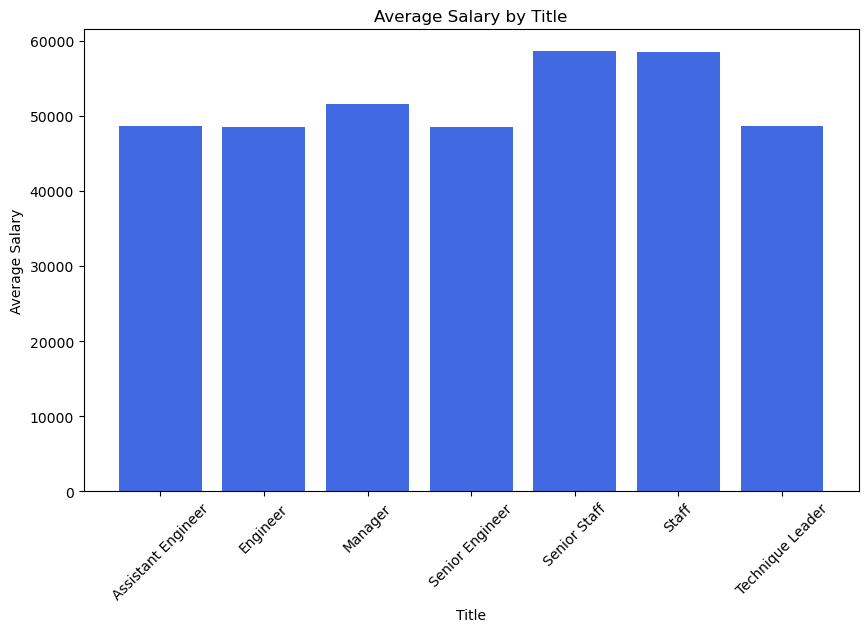

In [67]:
# Group the data by 'title' and calculate the average salary
salary_by_title = merged_df.groupby('title')['salary'].mean().reset_index()

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(salary_by_title['title'], salary_by_title['salary'], color='royalblue')
plt.title('Average Salary by Title')
plt.xlabel('Title')
plt.ylabel('Average Salary')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the bar graph
plt.show()